In [1]:
import datacube

from matplotlib import colors as mcolours
import numpy as np

dc = datacube.Datacube()

/env/lib/python3.6/site-packages/datacube/drivers/postgres/_connections.py:87: SADeprecationWarning: Calling URL() directly is deprecated and will be disabled in a future release.  The public constructor for URL is now the URL.create() method.
  username=username, password=password,


In [11]:
product = "esri_land_cover"
# This is a point in Madagascar
lat, lon = -19.455748, 46.464421
buf = 5
lons = (lon - buf, lon + buf)
lats = (lat - buf, lat + buf)

# Load the data at 500 m resolution, so that it's fast.
ds = dc.load(
    product=product,
    longitude=lons,
    latitude=lats,
    resolution=(-500, 500),
    output_crs="epsg:6933",
    dask_chunks={}
)

In [12]:
# Check the size of the area you want to load
ds

<xarray.Dataset>
Dimensions:         (time: 1, x: 1931, y: 2407)
Coordinates:
  * time            (time) datetime64[ns] 2020-01-01
  * y               (y) float64 -1.825e+06 -1.826e+06 ... -3.028e+06 -3.028e+06
  * x               (x) float64 4.001e+06 4.001e+06 ... 4.965e+06 4.966e+06
    spatial_ref     int32 6933
Data variables:
    classification  (time, y, x) uint8 dask.array<chunksize=(1, 2407, 1931), meta=np.ndarray>
Attributes:
    crs:           epsg:6933
    grid_mapping:  spatial_ref

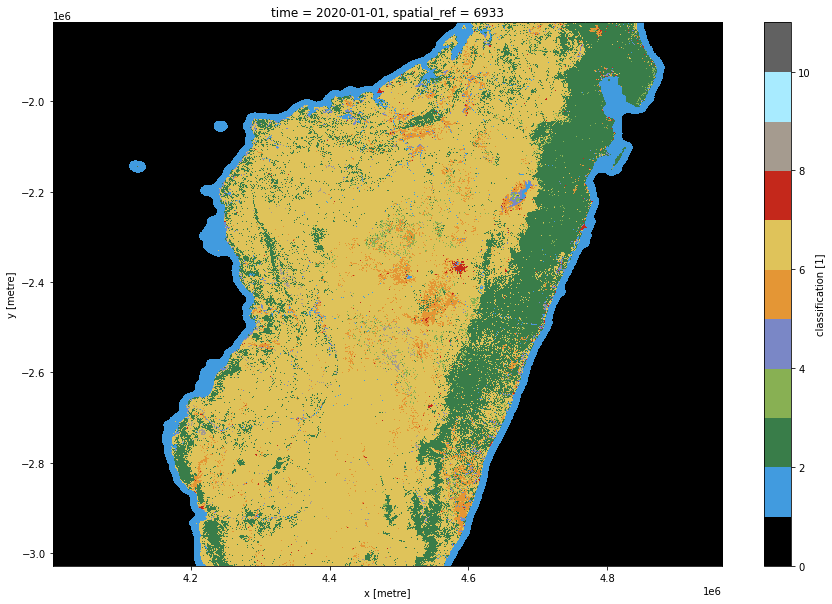

In [13]:
%matplotlib inline

# Colour it like the ESRI colour map
cmap = mcolours.ListedColormap([
      np.array([0, 0, 0]) / 255,
      np.array([65, 155, 223]) / 255,
      np.array([57, 125, 73]) / 255,
      np.array([136, 176, 83]) / 255,
      np.array([122, 135, 198]) / 255,
      np.array([228, 150, 53]) / 255,
      np.array([223, 195, 90]) / 255,
      np.array([196 ,40, 27]) / 255,
      np.array([165, 155, 143]) / 255,
      np.array([168, 235, 255]) / 255,
      np.array([97, 97, 97]) / 255
])
bounds=range(0,12)
norm = mcolours.BoundaryNorm(np.array(bounds), cmap.N)
ds.isel(time=0).classification.plot.imshow(cmap=cmap, norm=norm, size=10)